### 001532991_WeiRuan_FinalProject

## Title: using Credit Card customers dataset to predict churning customers

 https://www.kaggle.com/sakshigoyal7/credit-card-customers?select=BankChurners.csv

##### Task & Description
Description:

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 22 features. We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

Task:

We are expecting in-depth Exploratory Data Analysis that can help them finding where the difference lies between churning and non-churning customers and acquire a good model to predict churned customers.

In [239]:
# Import necessary packages'''
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from sklearn import ensemble

In [240]:
#load data
my_df = pd.read_csv("./BankChurners.csv") 

In [241]:
%pwd

'C:\\Users\\1\\Downloads\\python assigment\\finial assignment'

In [242]:
my_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [243]:
my_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [244]:
#drop the 'not needed' features
my_df.drop(my_df.columns[[21,22]], axis=1, inplace=True)

In [245]:
my_df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [246]:
my_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Feature Defenition

In [247]:
#Label Encoding With Label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(my_df['CLIENTNUM'])

l = [i for i in range(10127)]
dict(zip(list(le.classes_), l))

my_df['CLIENTNUM'] = le.transform(my_df['CLIENTNUM'])

In [248]:
my_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7152,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,9812,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3053,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,7204,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,501,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Label column distribution in our dataset:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

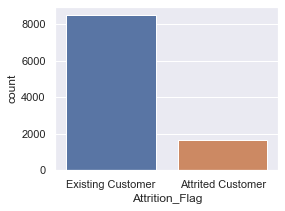

In [249]:
#check data balance
print('Label column distribution in our dataset:')
print(my_df.Attrition_Flag.value_counts())
sns.set(rc={'figure.figsize':(4,3)})
sns.countplot(data=my_df,x = 'Attrition_Flag')

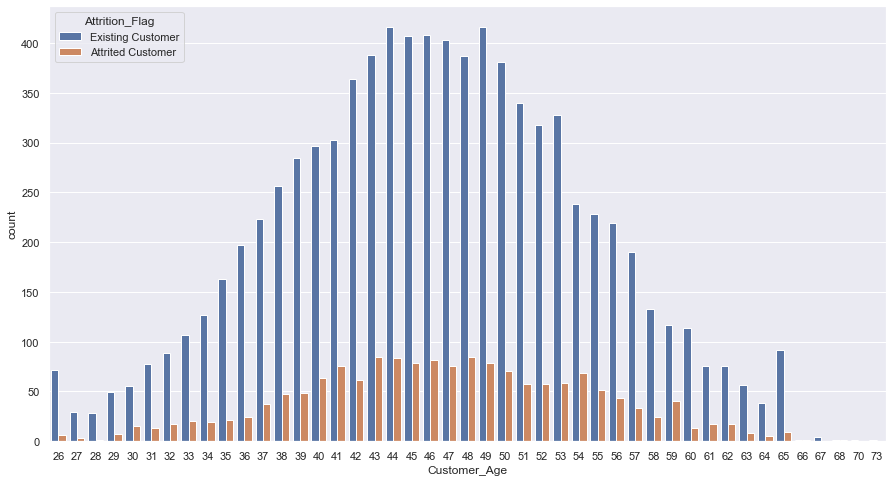

In [250]:
#check data balance in various column,such as customer ages.
plt.figure(figsize=[15,8])
sns.countplot(x='Customer_Age',data = my_df, hue='Attrition_Flag')
plt.show()

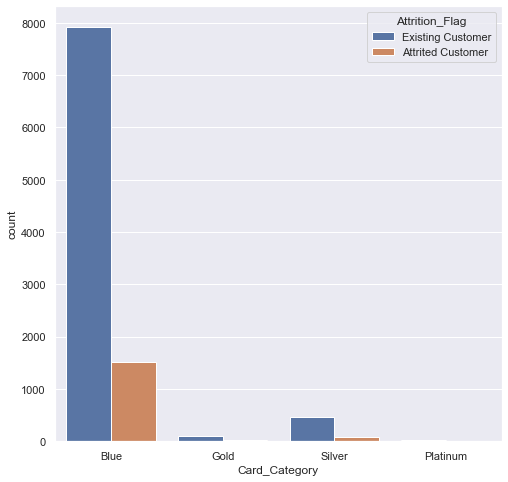

In [251]:
#check card category vs. Attrition flage 
plt.figure(figsize=[8,8])
sns.countplot(x='Card_Category',data = my_df, hue='Attrition_Flag')
plt.show()

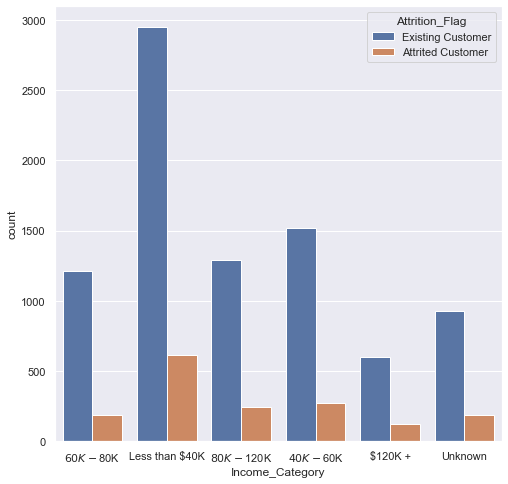

In [252]:
plt.figure(figsize=[8,8])
sns.countplot(x='Income_Category',data =my_df, hue='Attrition_Flag')
plt.show()

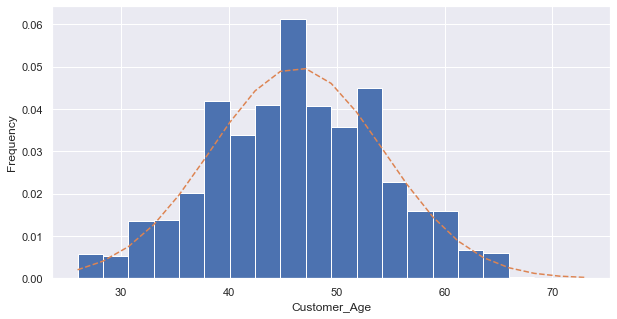

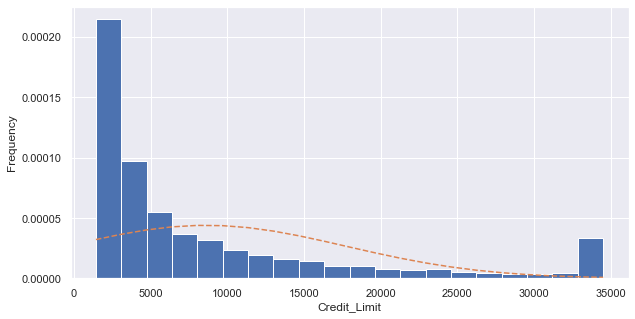

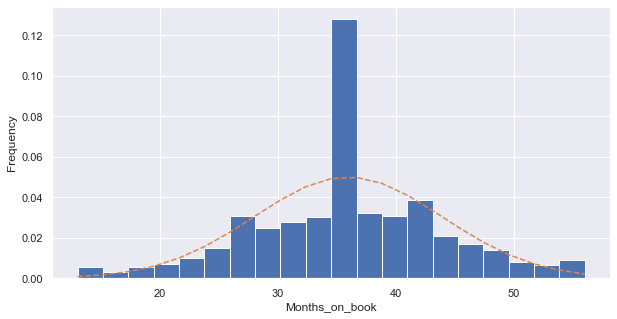

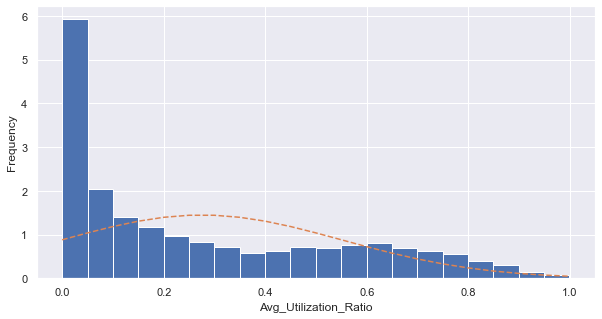

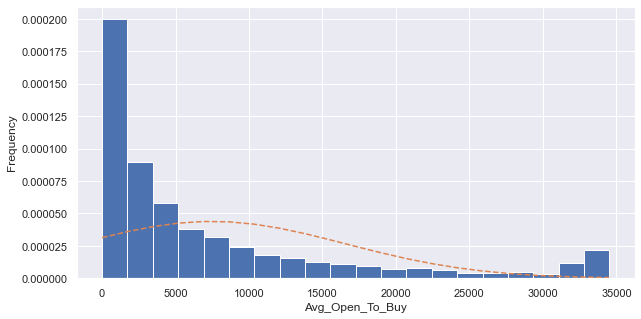

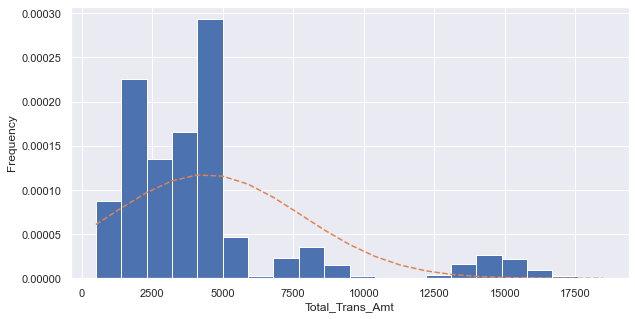

In [253]:
#check data distriubtion
Numericals = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']

for element in Numericals:
    num_bins = 20
    x = my_df[element]
    sigma = x.std()
    mu = x.mean()
    
    fig, ax = plt.subplots(figsize = (10, 5))

    n, bins, patches = ax.hist(x, num_bins, density=1)
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
    np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel(element)
    ax.set_ylabel('Frequency')
    plt.show()

In [254]:
#check Missing values.there are no missing value and we don't need to deal with it.

In [255]:
print('Number of missing values :')
print('')
print(my_df.isna().sum())

Number of missing values :

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


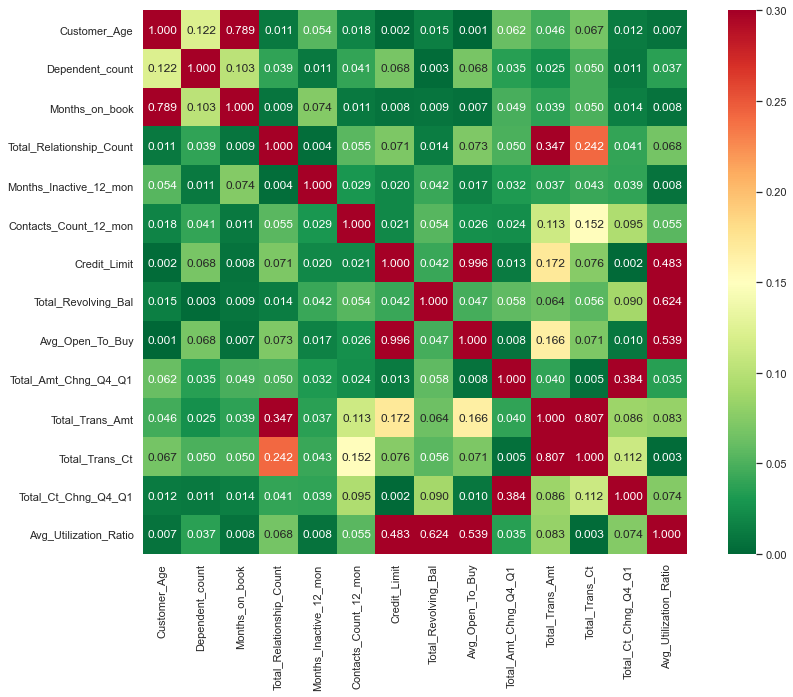

In [256]:
#check feature important factors, and we can find 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy' are important features.
numerical = ['Customer_Age','Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


corr_data = my_df.loc[:, numerical].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_data.abs(), vmax=0.3,vmin=0,annot=True, fmt='.3f',cmap='RdYlGn_r',square=True)
plt.show()

### convert text into number

In [257]:
# check the data type of each column
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [258]:
# Show the unique values of categorical variables
print("Attrition_Flag :",my_df["Attrition_Flag"].unique())
print("Gender         :",my_df["Gender"].unique())
print("Education_Level:",my_df["Education_Level"].unique())
print("Marital_Status :",my_df["Marital_Status"].unique())
print("Income_Category:",my_df["Income_Category"].unique())
print("Card_Category  :",my_df["Card_Category"].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender         : ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category  : ['Blue' 'Gold' 'Silver' 'Platinum']


In [259]:
# Convert variables with two categories into binary variables
my_df.loc[my_df["Attrition_Flag"] == "Existing Customer", "Attrition_Flag"] = 0
my_df.loc[my_df["Attrition_Flag"] == "Attrited Customer", "Attrition_Flag"] = 1
my_df["Attrition_Flag"] = my_df["Attrition_Flag"].astype(int)

my_df.loc[my_df["Gender"] == "F", "Gender"] = 0
my_df.loc[my_df["Gender"] == "M", "Gender"] = 1
my_df["Gender"] = my_df["Gender"].astype(int)

In [260]:
my_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,7152,0,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,9812,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3053,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,7204,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,501,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [261]:
#One hot encoding
df = pd.get_dummies(my_df)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,7152,0,45,1,3,39,5,1,3,12691.0,...,0,0,1,0,0,0,1,0,0,0
1,9812,0,49,0,5,44,6,1,2,8256.0,...,0,0,0,0,1,0,1,0,0,0
2,3053,0,51,1,3,36,4,1,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,7204,0,40,0,4,34,3,4,1,3313.0,...,0,0,0,0,1,0,1,0,0,0
4,501,0,40,1,3,21,5,1,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


In [262]:
# Split dataset into train and test Datasets

# Separate the dataset into features and target
X = df.drop(["Attrition_Flag"],axis=1)
y = df["Attrition_Flag"]

y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [263]:
# # encode string class values as integers
# label_encoder = LabelEncoder()
# label_encoder = label_encoder.fit(y)
# y = label_encoder.transform(y)

In [264]:
# we can find the data is imbalanced.

In [265]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### oversampling to deal with unbalanced datset

In [266]:
# using different methods of Oversampling to increase sample in train dataset where y==1

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE


In [267]:
# Random Oversampling
over_X_train, over_y_train = RandomOverSampler(sampling_strategy='minority').fit_resample(X_train, y_train)
# SMOTE
smote_X_train, smote_y_train = SMOTE().fit_resample(X_train,y_train)
# Boderline-SMOTE
bdlsmote_X_train, bdlsmote_y_train = BorderlineSMOTE().fit_resample(X_train, y_train)

In [268]:
# Check the results of rebalancing

# Random Oversampling
print("Random Oversampling\n", over_y_train.value_counts())
## SMOTE
print("SMOTE\n", smote_y_train.value_counts())
 # Boderline-SMOTE
print("Borderline-SMOTE\n", bdlsmote_y_train.value_counts())

Random Oversampling
 0    6352
1    6352
Name: Attrition_Flag, dtype: int64
SMOTE
 0    6352
1    6352
Name: Attrition_Flag, dtype: int64
Borderline-SMOTE
 0    6352
1    6352
Name: Attrition_Flag, dtype: int64


In [269]:
datasets = [X_train, y_train, over_X_train, over_y_train, smote_X_train, smote_y_train,
            bdlsmote_X_train, bdlsmote_y_train]

for dataset in datasets:
    pd.DataFrame(dataset)

In [270]:
# Concatenate training and test sets for each resampled datasets
train_concat = pd.concat([X_train, y_train], axis=1)
over_train_concat = pd.concat([over_X_train, over_y_train], axis=1)
smote_train_concat = pd.concat([smote_X_train, smote_y_train], axis=1)
bdlsmote_train_concat = pd.concat([bdlsmote_X_train, bdlsmote_y_train], axis=1)

Text(0.5, 1.0, 'Borderline-SMOTE')

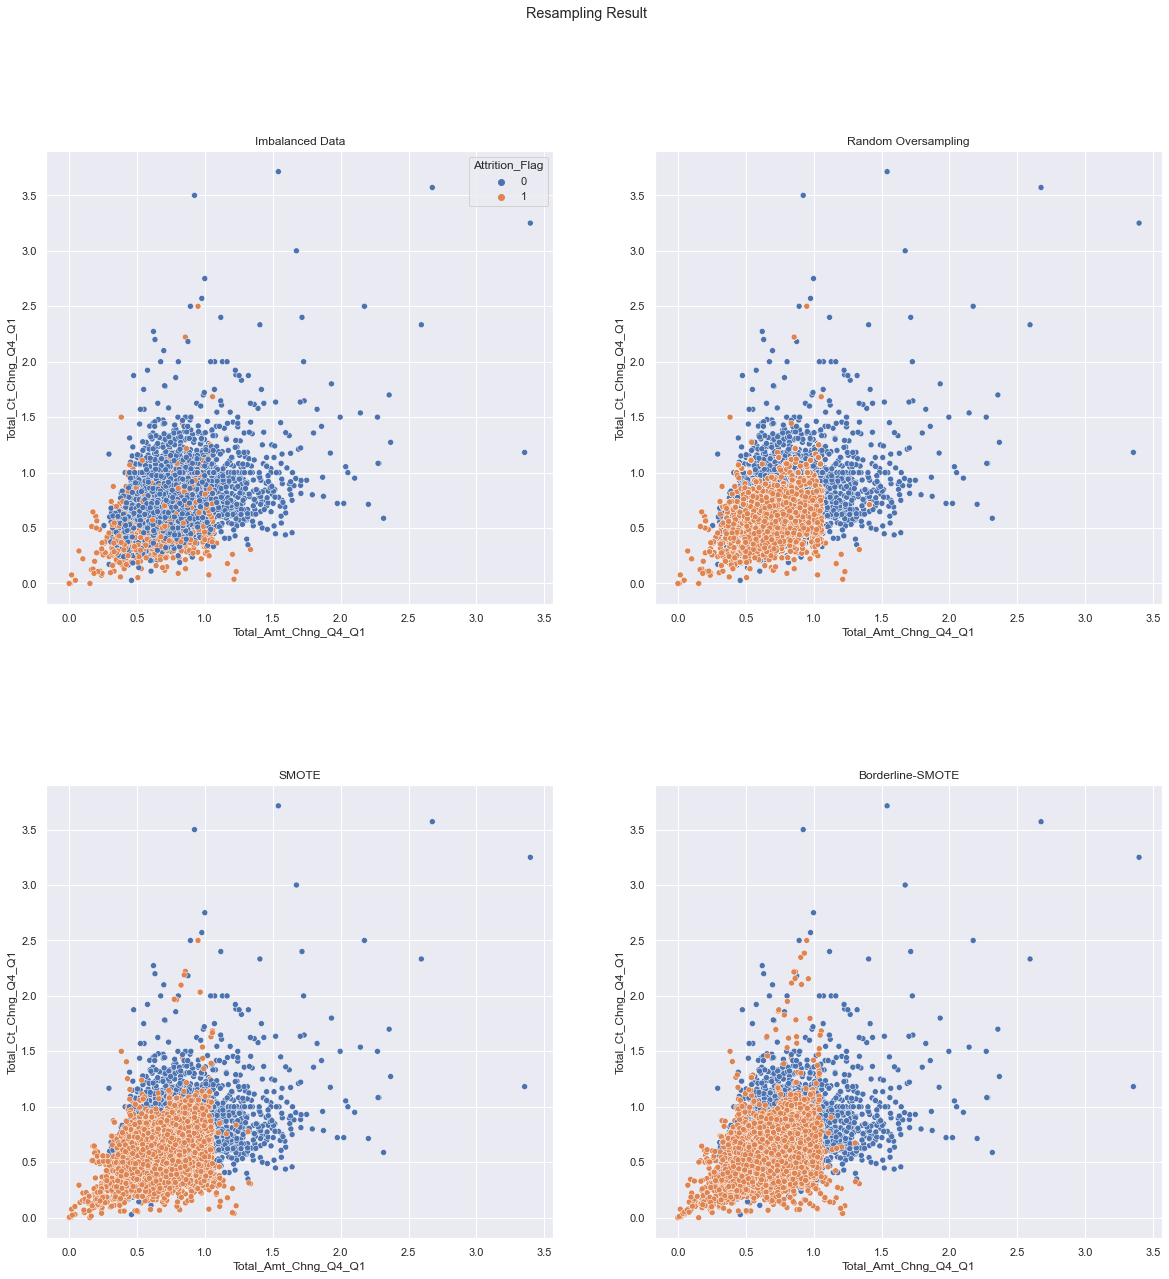

In [271]:
# Visualize resampling results
fig, axes = plt.subplots(2, 2, figsize=(20, 20),squeeze=True)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Resampling Result')

sns.scatterplot(ax=axes[0, 0], data=train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')
sns.scatterplot(ax=axes[0, 1], data=over_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', legend=False)
sns.scatterplot(ax=axes[1, 0], data=smote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[1, 1], data=bdlsmote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)

axes[0, 0].set_title("Imbalanced Data")
axes[0, 1].set_title("Random Oversampling")
axes[1, 0].set_title("SMOTE")
axes[1, 1].set_title("Borderline-SMOTE")

### standarization dataset

In [272]:

# Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [273]:
# Apply rebalancing to standardized data

# Random Oversampling
over_X_train, over_y_train = RandomOverSampler(sampling_strategy='minority').fit_resample(X_train, y_train)
# SMOTE
smote_X_train, smote_y_train = SMOTE().fit_resample(X_train, y_train)
# Boderline-SMOTE
bdlsmote_X_train, bdlsmote_y_train = BorderlineSMOTE().fit_resample(X_train, y_train)

### comparing various models by using different dataset in order to acquire higher accuracy.

using knn method to predict accuracy

In [274]:
# to test when k=1 the accuracy of prediction
from sklearn.neighbors import KNeighborsClassifier

my_knn_model = KNeighborsClassifier(n_neighbors = 1,weights = 'uniform')
my_knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [275]:
y_pred = my_knn_model.predict(X_test)

Confusion Matrix is : 
 [[1980  168]
 [ 230  154]]


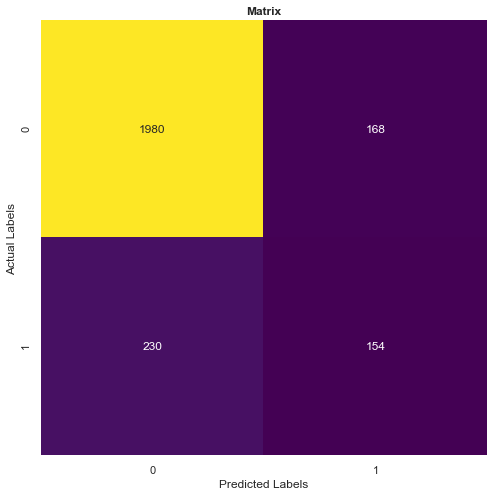

In [276]:
# using chart to show the accuracy and recall rate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

my_knn_cmatrix = confusion_matrix(y_test,y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, annot=True, fmt="d", cbar=False, cmap="viridis")
plt.title("Matrix", weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print('Confusion Matrix is : \n',  confusion_matrix(y_test, y_pred))


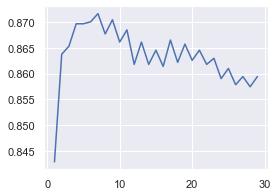

In [277]:
#using loops to find best hyper-parameter k
list1 = []
for neighbors in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,30)), list1)
plt.show()


In [278]:
# we can find the best n_neighbors should in set [5,6,7,8,9,10]

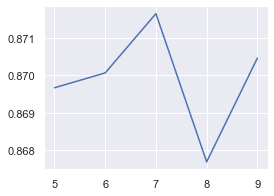

In [279]:

list1 = []
for neighbors in range(5,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(5,10)), list1)
plt.show()

In [280]:
# therefore, n_neighbors =7 is best parameters to get good result using knn method.

ROC AUC: 0.60


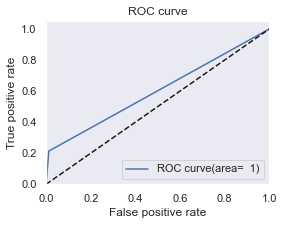

In [281]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



In [282]:
# using over_X_train, over_y_train data (Random Oversampling) to test when k=1 the accuracy of prediction
from sklearn.neighbors import KNeighborsClassifier

my_knn_model = KNeighborsClassifier(n_neighbors = 7,weights = 'uniform')
my_knn_model.fit(over_X_train, over_y_train)

KNeighborsClassifier(n_neighbors=7)

In [283]:
y_pred = my_knn_model.predict(X_test)

Confusion Matrix is : 
 [[1625  523]
 [ 122  262]]


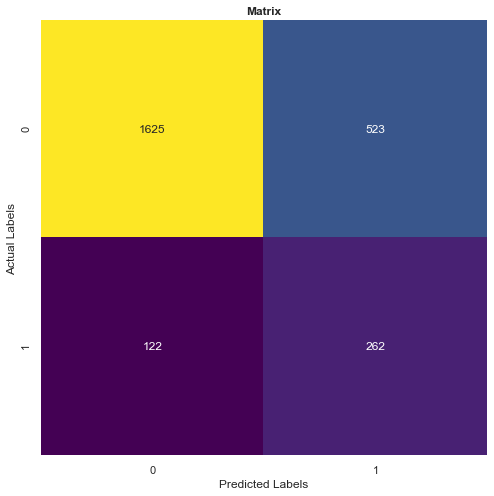

In [284]:
my_knn_cmatrix = confusion_matrix(y_test,y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, annot=True, fmt="d", cbar=False, cmap="viridis")
plt.title("Matrix", weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print('Confusion Matrix is : \n',  confusion_matrix(y_test, y_pred))


In [ ]:
#using original data can get higher accuracy than using oversampling data by adopting knn model

### Model Selection：
which models should be suitable for this dataset?
we should compare these models predict result and then decide to use it.

#### 1.comparing different methods by using original unbalanced dataset

In [296]:
# Create a model dictionary
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


models = {"K-Nearest Neighbors   ": KNeighborsClassifier(n_neighbors = 7,weights = 'uniform'),
          "Decision Tree         ": DecisionTreeClassifier(),
          "Random Forest         ": RandomForestClassifier(),
          "Neural Network        ": MLPClassifier(),
       
         }

In [297]:
# Fit the models on imbalanced data
for name, model in models.items():
    model.fit(X_train, y_train)

# Print AUC score
print("Imbalanced Data: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(X_test))))

C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Imbalanced Data: AUC score
K-Nearest Neighbors   : 0.609
Decision Tree         : 0.883
Random Forest         : 0.860
Neural Network        : 0.810


#### 2.contrast different method by using Random Oversampling dataset

In [298]:
# Fit the models on imbalanced data
for name, model in models.items():
    model.fit(over_X_train, over_y_train)

# Print AUC score
print("Random Oversampling: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(X_test))))

C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Oversampling: AUC score
K-Nearest Neighbors   : 0.719
Decision Tree         : 0.871
Random Forest         : 0.892
Neural Network        : 0.836


In [ ]:
# Random forest is a good choice.

#### 3. contrast different method by using SMOTE dataset

In [299]:
# Fit the models on imbalanced data
for name, model in models.items():
    model.fit(smote_X_train, smote_y_train)

# Print AUC score
print("SMOTE dataset: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(X_test))))

C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SMOTE dataset: AUC score
K-Nearest Neighbors   : 0.727
Decision Tree         : 0.897
Random Forest         : 0.903
Neural Network        : 0.833


#### 4. contrast different method by using Boderline-SMOTE dataset

In [300]:
# Fit the models on imbalanced data
for name, model in models.items():
    model.fit(bdlsmote_X_train, bdlsmote_y_train)

# Print AUC score
print("Boderline-SMOTE: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(X_test))))

C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Boderline-SMOTE: AUC score
K-Nearest Neighbors   : 0.741
Decision Tree         : 0.876
Random Forest         : 0.892
Neural Network        : 0.846


#### from above, we can find using Random forest model by adopting Boderline-SMOTE oversampling dataset can get a good result. 
##### in order to enhance accuacy further, we can tune hyperparameters.

#### 1. decide n_estimators of RandomForestClassifier

In [306]:
rf= RandomForestClassifier(oob_score=True)
rf.fit(smote_X_train, smote_y_train)
rf_pre=rf.predict(X_test)
rf_ret=rf.score(X_test,y_test)
print(rf_ret)

0.9537914691943128


In [167]:
from sklearn.ensemble import RandomForestRegressor as rfr

superpa = []
for i in range(5,500,5):
    mod = RandomForestClassifier(oob_score=True,n_estimators=i,n_jobs=-1) #setting n_estimators parameter from 5 to 500
    mod.fit(bdlsmote_X_train, bdlsmote_y_train)
    y_pre = mod.predict(X_test)
    a=accuracy_score(y_test,y_pre)
    superpa.append(a)
    print(superpa)

C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not h

[0.9249605055292259]
[0.9249605055292259, 0.9447077409162717]


C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


[0.9249605055292259, 0.9447077409162717, 0.9470774091627172]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.955371

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083]
[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

[0.9249605055292259, 0.9447077409162717, 0.9470774091627172, 0.94826224328594, 0.9486571879936809, 0.9470774091627172, 0.9498420221169036, 0.9478672985781991, 0.9518167456556083, 0.9506319115323855, 0.9510268562401264, 0.9494470774091627, 0.95260663507109, 0.9486571879936809, 0.9494470774091627, 0.9530015797788309, 0.9522116903633492, 0.9494470774091627, 0.9533965244865719, 0.9518167456556083, 0.9553712480252765, 0.9533965244865719, 0.9518167456556083, 0.95260663507109, 0.9537914691943128, 0.9533965244865719, 0.9490521327014217, 0.9545813586097947, 0.9530015797788309, 0.9537914691943128, 0.9522116903633492, 0.9502369668246445, 0.9514218009478673, 0.9514218009478673, 0.9494470774091627, 0.9498420221169036, 0.9537914691943128, 0.9545813586097947, 0.9514218009478673, 0.9522116903633492, 0.9514218009478673, 0.9518167456556083, 0.9533965244865719, 0.9530015797788309, 0.9530015797788309, 0.9553712480252765, 0.9541864139020537, 0.9522116903633492, 0.9514218009478673, 0.9553712480252765, 0.952

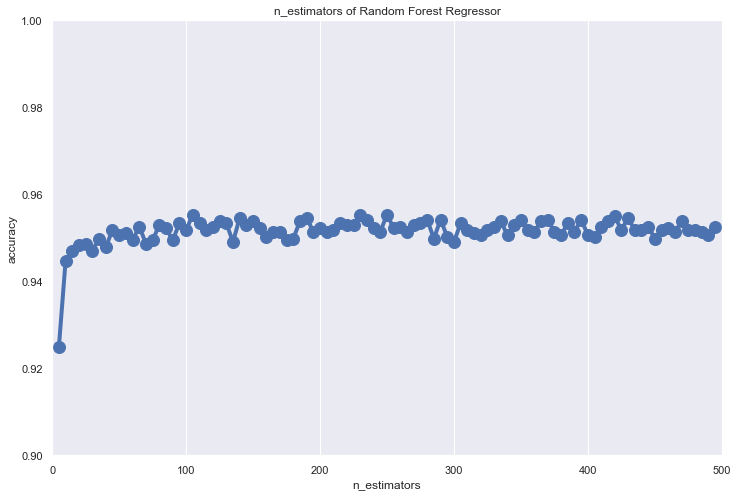

In [179]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(range(5,500,5),superpa,marker='o',
       linewidth=4,markersize=12)
ax.set_ylim([0.9,1])
ax.set_xlim([0,500])
plt.title("n_estimators of Random Forest Regressor")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')

plt.grid(axis='y')
plt.show()
plt.show()

In [180]:
#from above figure we can find the best 'n_estimators' should be between 100-150
# let's check accuracy of 'n_estimators' between 100-150

In [185]:
superpa = []
for i in range(100,150,2):
    mod = RandomForestClassifier(oob_score=True,n_estimators=i,n_jobs=-1) #setting n_estimators parameter from 100 to 150
    mod.fit(bdlsmote_X_train, bdlsmote_y_train)
    y_pre = mod.predict(X_test)
    a=accuracy_score(y_test,y_pre)
    superpa.append(a)
    print(superpa)

[0.9514218009478673]
[0.9514218009478673, 0.9494470774091627]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855, 0.94826224328594]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855, 0.94826224328594, 0.9518167456556083]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855, 0.94826224328594, 0.9518167456556083, 0.9545813586097947]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855, 0.94826224328594, 0.9518167456556083, 0.9545813586097947, 0.9518167456556083]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855, 0.94826224328594, 0.9518167456556083, 0.9545813586097947, 0.9518167456556083, 0.9530015797788309]
[0.9514218009478673, 0.9494470774091627, 0.9518167456556083, 0.9506319115323855, 0.94826224328594, 0.

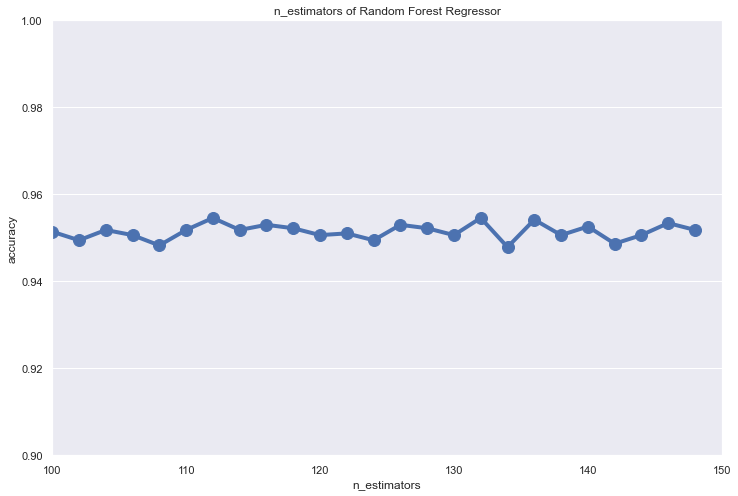

In [187]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(range(100,150,2),superpa,marker='o',
       linewidth=4,markersize=12)
ax.set_ylim([0.9,1])
ax.set_xlim([100,150])
plt.title("n_estimators of Random Forest Regressor")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')

plt.grid(axis='x')
plt.show()
plt.show()

In [ ]:
#from above figuer, we choose 'n_estimators'=114

### 2. tune other hyperparameters

In [235]:
%%time 
param_rf = {
    'bootstrap': [True],
    'max_depth': [5,6,7,8,9],
    'max_features': [1,11,12,13,14,16],
    'n_estimators': [114]
}


clf_rf = RandomForestClassifier()
clf=clf_rf.fit(bdlsmote_X_train, bdlsmote_y_train)
grid_rf = GridSearchCV(clf_rf, param_rf, cv = 2, n_jobs = -1)
grid_rf.fit(bdlsmote_X_train, bdlsmote_y_train)
print(grid_rf.best_estimator_)



RandomForestClassifier(max_depth=9, max_features=16, n_estimators=114)
Wall time: 27.2 s


In [190]:
#Evaluate classification performance
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
def evaluate_perf(y_test,y_pred):
    print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))
    print('====================')
    print("Accuracy : ", "{:.2f}".format(accuracy_score(y_test,y_pred)))
    print("Precision : ", "{:.2f}".format(precision_score(y_test,y_pred)))
    print("Recall : ","{:.2f}".format(recall_score(y_test,y_pred)))
    print("F1 :", "{:.2f}".format(f1_score(y_test,y_pred)))

In [136]:
y_pred_rf = grid_rf.predict(X_test)
evaluate_perf(y_test,y_pred_rf)

Predicted     0    1
Actual              
0          2026  122
1            40  344
Accuracy :  0.94
Precision :  0.74
Recall :  0.90
F1 : 0.81


Confusion Matrix is : 
 [[2026  122]
 [  40  344]]


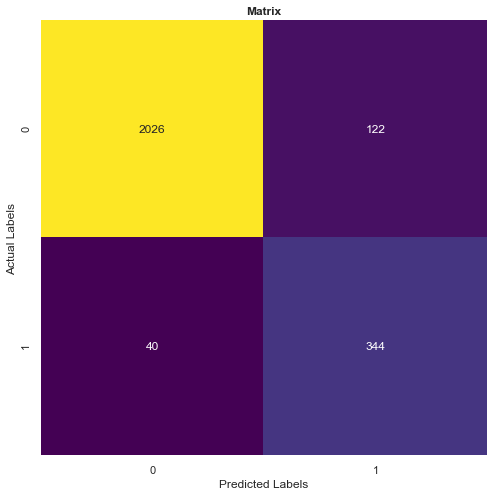

In [206]:
my_cmatrix = confusion_matrix(y_test,y_pred_rf)

my_df1 = pd.DataFrame(my_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_df1, annot=True, fmt="d", cbar=False, cmap="viridis")
plt.title("Matrix", weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print('Confusion Matrix is : \n',  confusion_matrix(y_test,y_pred_rf))

In [207]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2148
           1       0.74      0.90      0.81       384

    accuracy                           0.94      2532
   macro avg       0.86      0.92      0.89      2532
weighted avg       0.94      0.94      0.94      2532



In [208]:
# lets check the confusion matrix
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)
accuracy_score(y_test,y_pred_rf)

[[2026  122]
 [  40  344]]


0.9360189573459715

<Figure size 720x720 with 0 Axes>

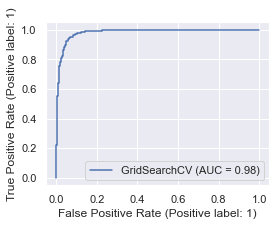

In [221]:
# ROC 
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(10,10))
plot_roc_curve(grid_rf, X_test, y_test);




In [138]:
### we can find accuracy up to 0.94 after tuning hyperparameters.

### Voting Classifier

In [201]:
# in order to improve accuracy further, we use Ensemble Learning to combine different methods.

In [202]:
# defining Random forest, DNN and Decision Tree classifer
rf = RandomForestClassifier(oob_score=True,max_depth=9, max_features=13, n_estimators=114)
dt= DecisionTreeClassifier()
dnn= MLPClassifier()

In [203]:
from sklearn.ensemble import VotingClassifier
#using max voting method to predict 
ensemble_max_voting= VotingClassifier(estimators=[('DNN', dnn), ('RF', rf),('dt', dt)], voting='soft')
ensemble_max_voting.fit(bdlsmote_X_train, bdlsmote_y_train)

y_pred = ensemble_max_voting.predict(X_test)
print('acc: ', accuracy_score(y_pred, y_test))

C:\Users\1\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


acc:  0.9447077409162717


In [ ]:
# the final accuracy can be up to 94.47%.